In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("D:/machine learning/decision tree/data.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#筛选特征
data.drop(["Cabin","Name","Ticket"],inplace = True,axis=1)

In [9]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [11]:
#处理缺失值
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [12]:
data["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [15]:
data = data.dropna()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [26]:
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))

C:\Users\steven_cha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,0
1,2,1,1,female,38.000000,1,0,71.2833,1
2,3,1,3,female,26.000000,0,0,7.9250,0
3,4,1,1,female,35.000000,1,0,53.1000,0
4,5,0,3,male,35.000000,0,0,8.0500,0
5,6,0,3,male,29.699118,0,0,8.4583,2
6,7,0,1,male,54.000000,0,0,51.8625,0
7,8,0,3,male,2.000000,3,1,21.0750,0
8,9,1,3,female,27.000000,0,2,11.1333,0
9,10,1,2,female,14.000000,1,0,30.0708,1


In [36]:
data["Sex"]
data["Sex"] = (data["Sex"]).astype("int")

C:\Users\steven_cha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [40]:
x = data.iloc[:,data.columns != "Survived"]

In [42]:
y = data.iloc[:,data.columns == "Survived"]

In [43]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [44]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size = 0.3)

In [50]:
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

In [51]:
Xtest

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,683,3,1,20.000000,0,0,9.2250,0
1,257,1,0,29.699118,0,0,79.2000,1
2,717,1,0,38.000000,0,0,227.5250,1
3,101,3,0,28.000000,0,0,7.8958,0
4,695,1,1,60.000000,0,0,26.5500,0
5,701,1,0,18.000000,1,0,227.5250,1
6,363,3,0,45.000000,0,1,14.4542,1
7,104,3,1,33.000000,0,0,8.6542,0
8,135,2,1,25.000000,0,0,13.0000,0
9,575,3,1,16.000000,0,0,8.0500,0


In [52]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain,Ytrain)

In [53]:
score = clf.score(Xtest,Ytest)
score

0.7303370786516854

In [55]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state = 25)
score = cross_val_score(clf,x,y,cv=10).mean()
score

0.7469611848825333

0.8166624106230849


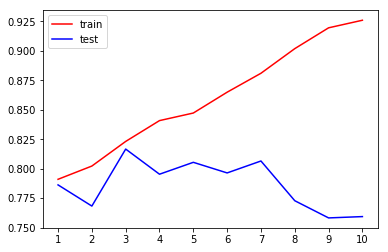

In [60]:
tr = []
te = []

for i in range(10):
    clf = DecisionTreeClassifier(criterion="entropy"
                                 ,random_state=25
                                 ,max_depth=i+1
                                )
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv = 10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label = "train")
plt.plot(range(1,11),te,color="blue",label = "test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [61]:
#网格搜索：能够帮助我们同时调整多个参数的技术，枚举技术

In [62]:
import numpy as np
gini_threholds = np.linspace(0,0.5,50)
#entropy_threholds = np.linspace(0,1,50)


#一串参数和这些参数对应的，我们希望网格搜索来搜索的参数的取值范围
papameters = {"criterion":("gini","entropy")
             ,"splitter":("best","random")
             ,"max_depth":[*range(1,10)]
             ,"min_samples_leaf" :[*range(1,50,5)]
             ,"min_impurity_decrease":np.linspace(0,0.5,50)
             }

clf = DecisionTreeClassifier(random_state = 25)
GS = GridSearchCV(clf,papameters,cv=10)
GS.fit(Xtrain,Ytrain)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random'), 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46], 'min_impurity_decrease': array([0.     , 0.0102 , 0.02041, 0.03061, 0.04082, 0.05102, 0.06122,
       0.07143, 0.08163, ...16, 0.41837,
       0.42857, 0.43878, 0.44898, 0.45918, 0.46939, 0.47959, 0.4898 ,
       0.5    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
score = GS.score(Xtest,Ytest)
score

0.7902621722846442

In [65]:
GS.best_params_ #从我们输入的参数和参数取值的列表中，返回最佳组合

{'criterion': 'gini',
 'max_depth': 6,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'random'}

In [66]:
GS.best_score_ #网格搜索后的模型的评判标准

0.837620578778135